# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



QUESTION 1:

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

airbnb = pd.read_csv('airbnb_hw.csv')

airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [269]:
airbnb.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [270]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce').astype('Int64')
airbnb.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [271]:
from sklearn.impute import SimpleImputer

airbnb = airbnb.dropna(subset=['Host Since'])
airbnb = airbnb.dropna(subset=['Zipcode'])
airbnb = airbnb.dropna(subset=['Property Type'])
airbnb = airbnb.dropna(subset=['Review Scores Rating (bin)'])
airbnb = airbnb.dropna(subset=['Review Scores Rating'])
imputer = SimpleImputer(strategy='mean')

airbnb["Beds"] = imputer.fit_transform(airbnb[["Beds"]])


In [272]:
airbnb.isnull().sum()

Host Id                        0
Host Since                     0
Name                           0
Neighbourhood                  0
Property Type                  0
Review Scores Rating (bin)     0
Room Type                      0
Zipcode                        0
Beds                           0
Number of Records              0
Number Of Reviews              0
Price                         51
Review Scores Rating           0
dtype: int64

In [273]:
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0


In [274]:
airbnb.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,2.205300e+04,22053.000000,22053.000000,22053.000000,22053.0,22053.000000,22002.0,22053.000000
mean,1.104171e+07,90.734821,10575.189951,1.556747,1.0,16.442389,150.777248,91.989162
std,1.079545e+07,9.068029,597.713722,1.042356,0.0,24.216802,100.122206,8.859312
min,5.000000e+02,20.000000,7105.000000,0.000000,1.0,1.000000,10.0,20.000000
25%,2.242776e+06,85.000000,10016.000000,1.000000,1.0,2.000000,85.0,89.000000
50%,6.897732e+06,90.000000,10044.000000,1.000000,1.0,7.000000,125.0,94.000000
75%,1.806554e+07,100.000000,11216.000000,2.000000,1.0,20.000000,190.0,100.000000
max,4.272660e+07,100.000000,11694.000000,16.000000,1.0,257.000000,999.0,100.000000


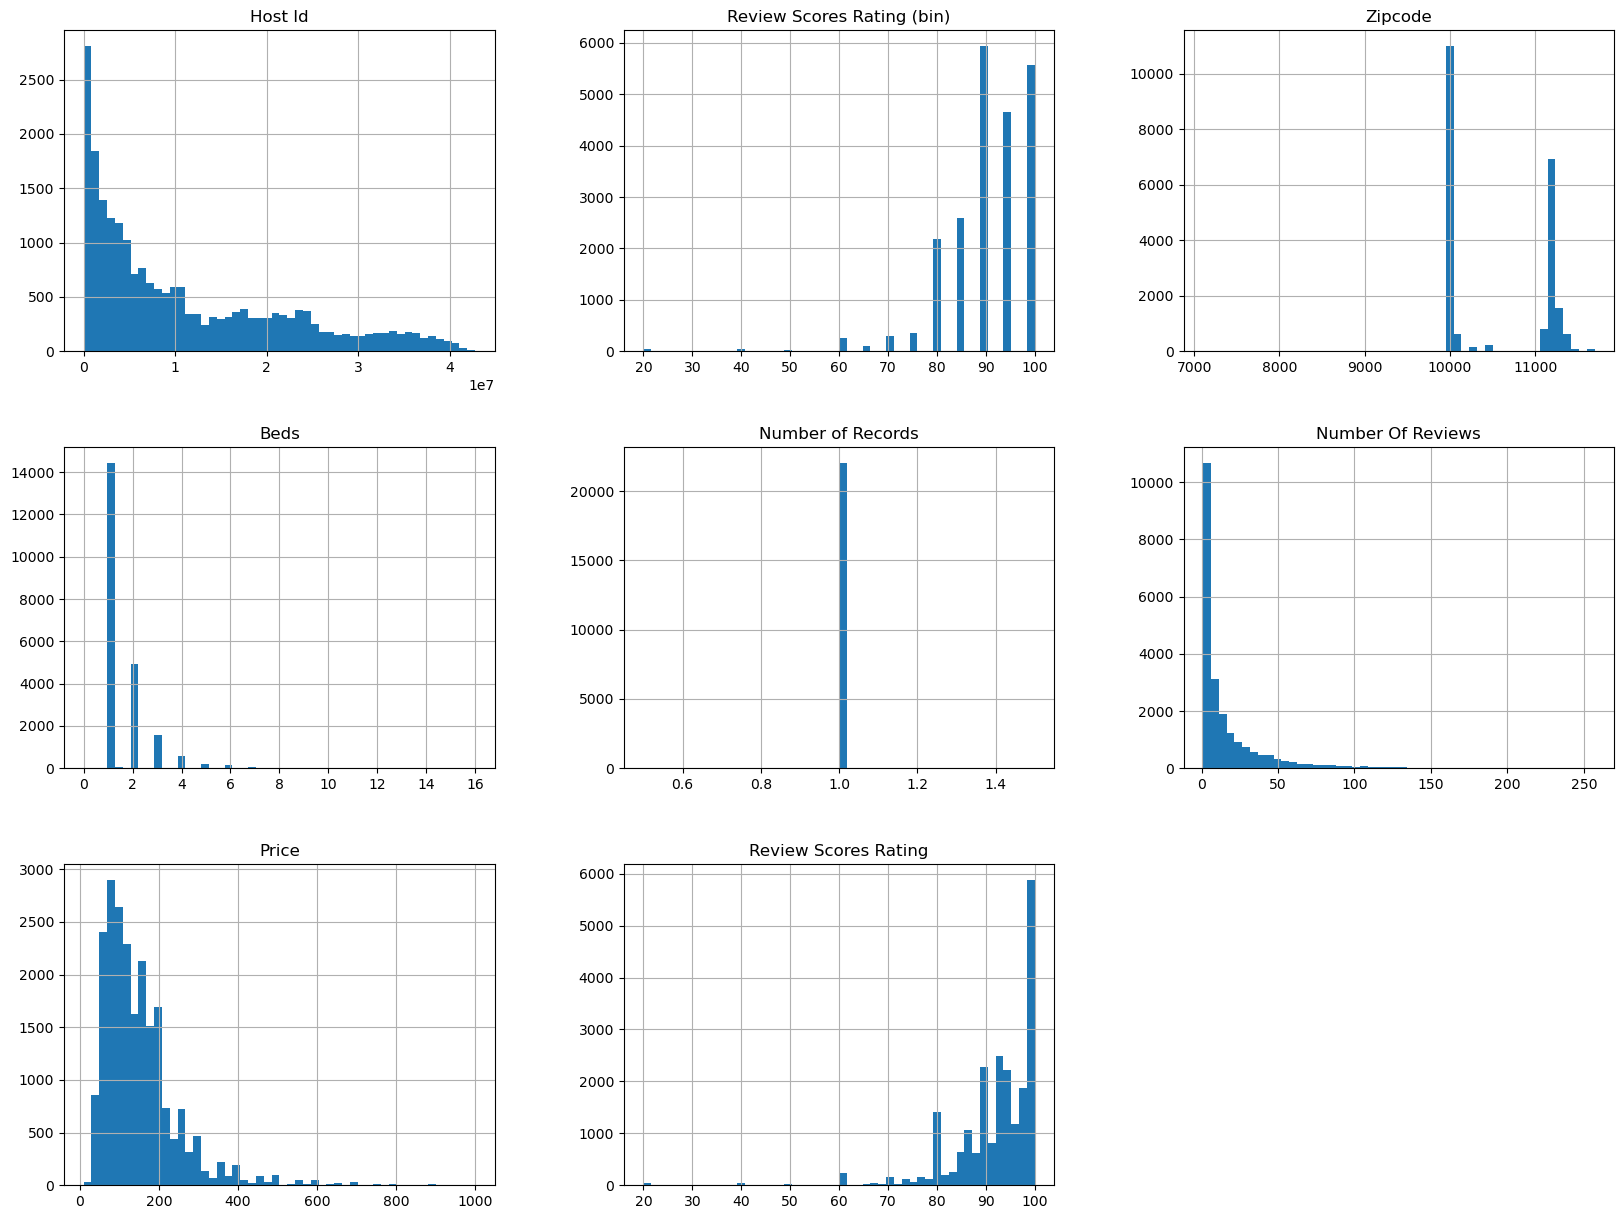

In [275]:
airbnb.hist(bins=50, figsize=(20,15))
plt.show()

Price                         1.000000
Beds                          0.441344
Review Scores Rating          0.087754
Review Scores Rating (bin)    0.083372
Number Of Reviews            -0.027893
Host Id                      -0.075727
Zipcode                      -0.285412
Number of Records                  NaN
Name: Price, dtype: float64


/root/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

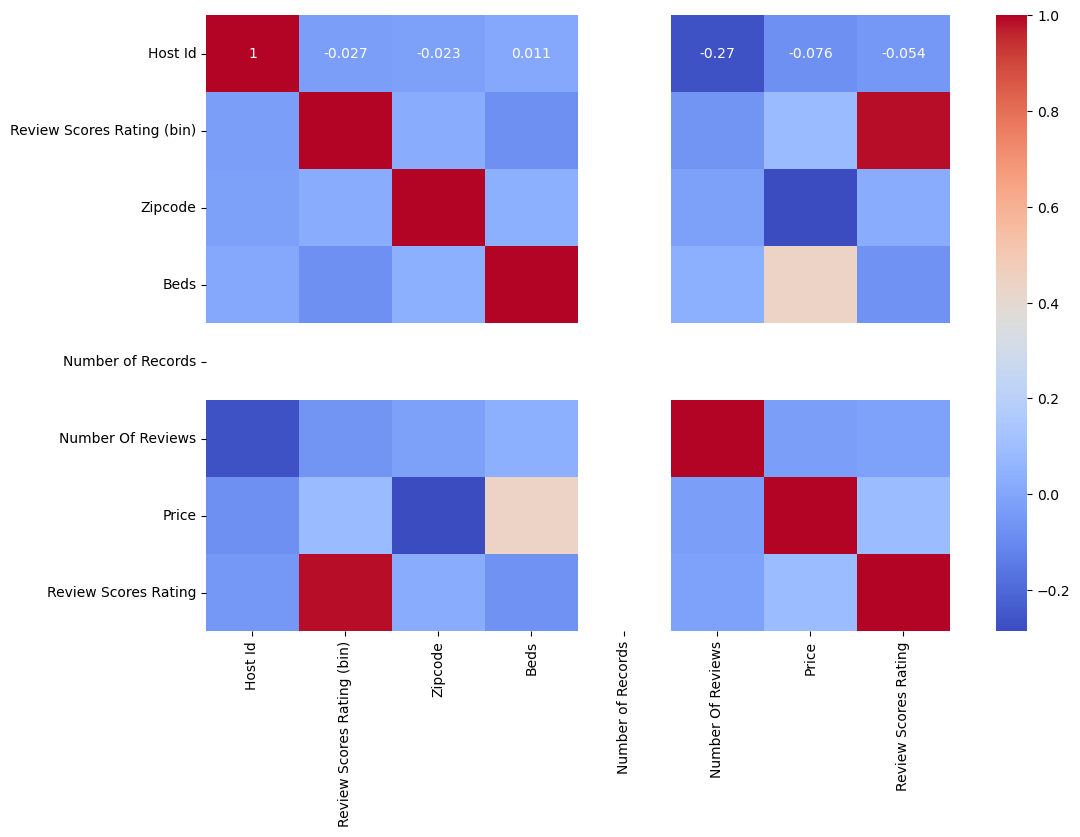

In [276]:
numerical_cols = airbnb.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = airbnb[numerical_cols].corr()


price_correlation = correlation_matrix['Price'].sort_values(ascending=False)


print(price_correlation)
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

QUESTION 2:

In [277]:
categorical_columns = airbnb.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(col, airbnb[col].nunique() )

Host Since 2200
Name 21510
Neighbourhood  5
Property Type 18
Room Type 3


In [278]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
airbnb = airbnb.drop(columns=['Name'])
airbnb = airbnb.dropna(subset=['Price'])
airbnb['Host Since'] = pd.to_datetime(airbnb['Host Since'], errors='coerce').dt.year.astype('Int64')
categories_to_encode = ['Property Type', 'Room Type', 'Neighbourhood ']
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categories_to_encode)
    ],
    remainder='passthrough'
)

transformed_data = transformer.fit_transform(airbnb)
encoded_columns = transformer.named_transformers_['cat'].get_feature_names_out(categories_to_encode)
non_encoded_columns = [col for col in airbnb.columns if col not in categories_to_encode]
all_columns = list(encoded_columns) + non_encoded_columns
airbnb = pd.DataFrame(transformed_data, columns=all_columns, index=airbnb.index)
airbnb[encoded_columns] = airbnb[encoded_columns].astype(int)


airbnb.head()

,Property Type_Bed & Breakfast,Property Type_Boat,Property Type_Bungalow,Property Type_Cabin,Property Type_Camper/RV,Property Type_Castle,Property Type_Chalet,Property Type_Condominium,Property Type_Dorm,Property Type_House,...,Neighbourhood _Staten Island,Host Id,Host Since,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,0,0,0,0,0,0,0,0,0,0,...,0,500,2008,95.0,10036.0,3.0,1,39,549,96.0
5,0,0,0,0,0,0,0,0,0,0,...,0,1039,2008,100.0,11222.0,1.0,1,4,149,100.0
6,0,0,0,0,0,0,0,0,0,0,...,0,1783,2008,100.0,10004.0,1.0,1,9,250,100.0
7,0,0,0,0,0,0,0,0,0,0,...,0,2078,2008,90.0,11201.0,1.0,1,80,90,94.0
8,0,0,0,0,0,0,0,0,0,0,...,0,2339,2008,90.0,10009.0,2.0,1,95,270,90.0


In [279]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22002 entries, 4 to 30409
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Property Type_Bed & Breakfast  22002 non-null  int64 
 1   Property Type_Boat             22002 non-null  int64 
 2   Property Type_Bungalow         22002 non-null  int64 
 3   Property Type_Cabin            22002 non-null  int64 
 4   Property Type_Camper/RV        22002 non-null  int64 
 5   Property Type_Castle           22002 non-null  int64 
 6   Property Type_Chalet           22002 non-null  int64 
 7   Property Type_Condominium      22002 non-null  int64 
 8   Property Type_Dorm             22002 non-null  int64 
 9   Property Type_House            22002 non-null  int64 
 10  Property Type_Hut              22002 non-null  int64 
 11  Property Type_Lighthouse       22002 non-null  int64 
 12  Property Type_Loft             22002 non-null  int64 
 13  Proper

In [280]:
columns_to_convert = [
    'Host Id',
    'Host Since',
    'Review Scores Rating (bin)',
    'Zipcode',
    'Beds',
    'Number of Records',
    'Number Of Reviews',
    'Price',
    'Review Scores Rating'
]

airbnb[columns_to_convert] = airbnb[columns_to_convert].apply(pd.to_numeric, errors='coerce')

airbnb = airbnb.dropna(subset=columns_to_convert)

airbnb[columns_to_convert] = airbnb[columns_to_convert].astype(int)
print(airbnb.dtypes)
airbnb.info()

Property Type_Bed & Breakfast    int64
Property Type_Boat               int64
Property Type_Bungalow           int64
Property Type_Cabin              int64
Property Type_Camper/RV          int64
Property Type_Castle             int64
Property Type_Chalet             int64
Property Type_Condominium        int64
Property Type_Dorm               int64
Property Type_House              int64
Property Type_Hut                int64
Property Type_Lighthouse         int64
Property Type_Loft               int64
Property Type_Other              int64
Property Type_Townhouse          int64
Property Type_Treehouse          int64
Property Type_Villa              int64
Room Type_Private room           int64
Room Type_Shared room            int64
Neighbourhood _Brooklyn          int64
Neighbourhood _Manhattan         int64
Neighbourhood _Queens            int64
Neighbourhood _Staten Island     int64
Host Id                          int64
Host Since                       int64
Review Scores Rating (bin

Question 3:

In [281]:
from sklearn.model_selection import train_test_split
X = airbnb.drop('Price', axis=1)
y = airbnb['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Question4

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_train_pred = model_1.predict(X_train)
y_test_pred = model_1.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('rmse', train_rmse, 'R^2', train_r2)
print('rmse', test_rmse, 'R^2', test_r2)

#gonna try to build a model with fewer features:

fewer_features = [
    'Host Id',
    'Host Since',
    'Review Scores Rating (bin)',
    'Zipcode',
    'Beds',
    'Number of Records',
    'Number Of Reviews',
    'Review Scores Rating'
]


X_fewer = X[fewer_features]
X_train_fewer, X_test_fewer, y_train_fewer, y_test_fewer = train_test_split(X_fewer, y, test_size=0.2, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train_fewer, y_train_fewer)

y_train_pred_fewer = model_2.predict(X_train_fewer)
y_test_pred_fewer = model_2.predict(X_test_fewer)

train_rmse_fewer = np.sqrt(mean_squared_error(y_train_fewer, y_train_pred_fewer))
test_rmse_fewer = np.sqrt(mean_squared_error(y_test_fewer, y_test_pred_fewer))
train_r2_fewer = r2_score(y_train_fewer, y_train_pred_fewer)
test_r2_fewer = r2_score(y_test_fewer, y_test_pred_fewer)

print('rmse_few', train_rmse_fewer, 'R^2_few', train_r2_fewer)
print('rmse_few', test_rmse_fewer, 'R^2_Few', test_r2_fewer)

Training RMSE: 73.19307906907414, R^2: 0.4618959185494511
Test RMSE: 75.98747646721326, R^2: 0.4390846980929515
Training RMSE (fewer features): 82.50781148591943, R^2: 0.31622001129064525
Test RMSE (fewer features): 84.46034938175096, R^2: 0.3070227276160933


The model with fewer features is performing worse than the model with more features

Question 5:

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
X = airbnb.drop('Price', axis=1)  
y = airbnb['Price']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('rmse rf', train_rmse, 'R^2 rf', train_r2)
print('rmse rf', test_rmse, 'R^2 rf', test_r2)

rmse rf 25.525703260596 R^2 rf 0.9345542146131312
rmse rf 69.35857492169455 R^2 rf 0.5326808622896455


My more complex model performed much better! It has a smaller rmse 

Question 5:

Overall, I have learned a lot about overfitting. You can clearly see that when you look at the difference in performance between the training and testing data sets. When you underfit, your model might perform worse aswell, as seen when I removed a large number of features. So it is important to engineer your model until you find the right balance. 